In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
class Action:             #This class represents an action that can be taken in the bandit problem.
  def __init__(self, m):
    self.m = m            #Initializes an action with a given mean m, which represents the true mean reward of the action.
    self.mean = 0         #Represents the current estimate of the mean reward for the action.
    self.N = 0            #Represents the number of times this action has been chosen.
  
  def select(self):       #Chooses the action and returns a reward.
    return np.random.normal(0,1) + self.m   #It randomly samples from a normal distribution with mean self.m and standard deviation 1. This simulates the reward received when selecting the action.

# Update the action-value estimate
  def update(self, x, alpha=0.1):   #Updates the action's estimate of the mean reward based on a new observation x
    self.N += 1
    self.mean = self.mean + alpha*(x-self.mean) #simple incremental update rule that updates the mean reward estimate using a step size alpha which is 0.1.

**Update Method**
*   When an action is selected and its reward is observed (represented by x), the update method is called to update the action's estimate of the mean reward.
*   This method implements a simple incremental update formula for updating the mean reward estimate. The formula is derived from the sample mean update rule in statistics and is a form of incremental learning.
*   The formula updates the mean estimate (self.mean) by moving it slightly towards the observed reward x. The step size of the update is controlled by the alpha parameter, where smaller values of alpha result in slower adaptation to new observations.





# **Two Arm Bandit**

In [28]:
'''This function takes four parameters:
m1: The mean reward of the first action (arm).
m2: The mean reward of the second action (arm).
eps: The probability of choosing a random action (exploration rate).
N: The total number of iterations (time steps) to run the bandit problem.'''

def two_arm_bandit_epsilon_greedy(m1, m2, eps, N):
  actions = [Action(m1), Action(m2)]                      #initializes two actions with means m1 and m2.
  data = np.empty(N)                                      #initializes an empty array data to store the rewards obtained in each iteration.
  explore,exploit=0,0                                    # '''counters explore and exploit to keep track of how many times the algorithm explores
  #                                                         (chooses a random action) and exploits (chooses the action with the highest estimated reward), respectively.'''
  for i in range(N):
    p = np.random.random()                                #generates a random number p between 0 and 1.
    if p < eps:                                           #If p is less than eps, the algorithm chooses to explore by randomly selecting one of the actions.
      j = np.random.choice(2)                             #'''If p is greater than or equal to eps, the algorithm chooses to exploit by selecting the action with
      #                                                        the highest estimated reward.'''
      explore+=1
    else:
      j = np.argmax([a.mean for a in actions])            #'''It selects the chosen action (j), selects a reward (x), and updates the action's estimate based
                                                            #on the observed reward using a fixed step size of 0.1.'''
      exploit+=1
    x = actions[j].select()
    actions[j].update(x,0.1)
    data[i] = x                                            #It stores the observed reward x in the data array.
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)     #calculates the cumulative average reward obtained at each time step and plots it.
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.show()
  print("No of times explored: ",explore)
  print("No of times exploited: ",exploit)
  for i in range(len(actions)):
    print(f"Mean of rewards from arm {i+1}: {actions[i].mean}")     #prints the final estimated mean rewards for each action.
  return cumulative_average                                         #returns the cumulative average rewards over time.

**Two Armed Bandit Problem**

*   The algorithm balances exploration and exploitation using the epsilon-greedy strategy. With probability eps, it explores by choosing a random action, and with probability 1-eps, it exploits by choosing the action with the highest estimated reward.
*   It maintains estimates of the mean rewards for each action and updates them incrementally based on observed rewards.
The algorithm's performance is evaluated by plotting the cumulative average reward over time and printing relevant statistics such as exploration and exploitation counts and final estimated mean rewards.



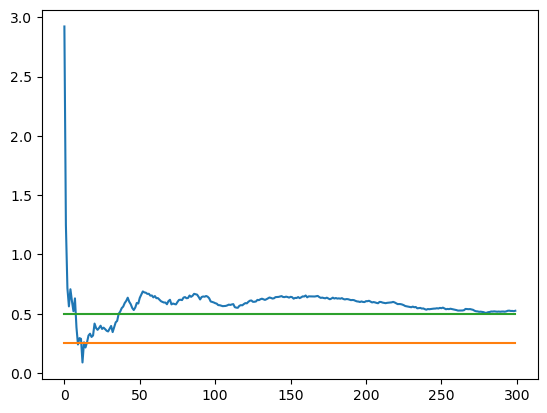

No of times explored:  29
No of times exploited:  271
Mean of rewards from arm 1: -0.02078784004107831
Mean of rewards from arm 2: 0.6494635501429633


In [29]:
c1 = two_arm_bandit_epsilon_greedy(0.25, 0.5, 0.1, 300)

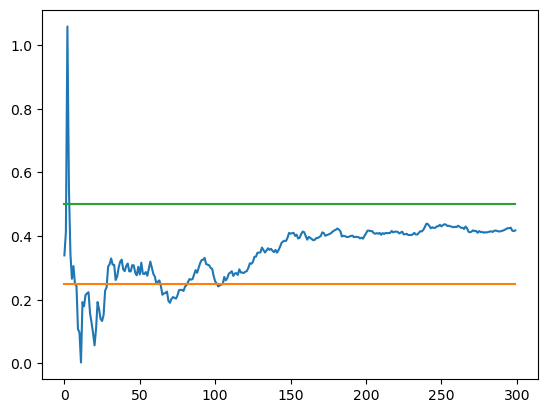

No of times explored:  8
No of times exploited:  292
Mean of rewards from arm 1: -0.1449035755721813
Mean of rewards from arm 2: 0.39124503570478636


In [30]:
c2 = two_arm_bandit_epsilon_greedy(0.25, 0.5, 0.05, 300)

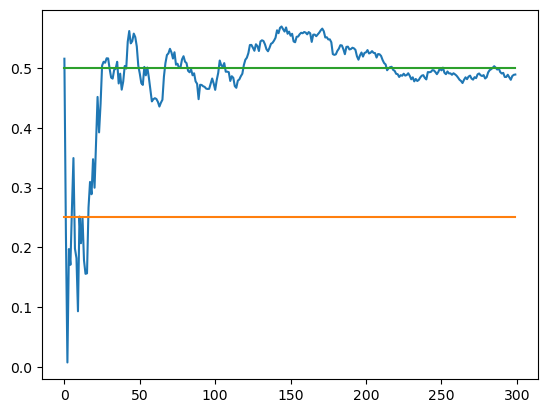

No of times explored:  5
No of times exploited:  295
Mean of rewards from arm 1: -0.14699517906610954
Mean of rewards from arm 2: 0.4900145589345406


In [31]:
c3 = two_arm_bandit_epsilon_greedy(0.25, 0.5, 0.01, 300)

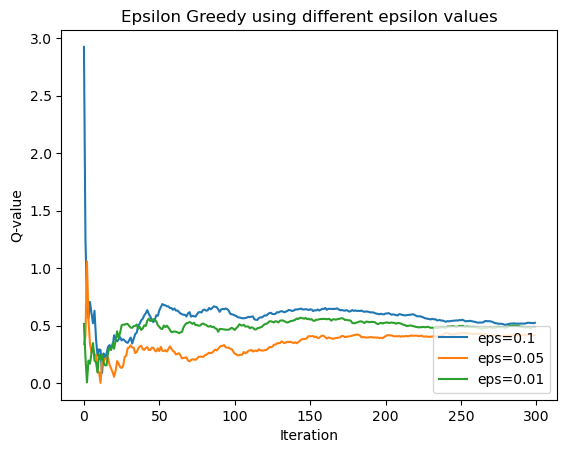

In [32]:
plt.plot(c1,label='eps=0.1')
plt.plot(c2,label='eps=0.05')
plt.plot(c3,label='eps=0.01')
plt.xlabel('Iteration')
plt.ylabel('Q-value')
plt.title('Epsilon Greedy using different epsilon values')
plt.legend(loc='lower right')

# **Three Arm Bandit**

In [33]:
def three_arm_bandit_epsilon_greedy(m1, m2, m3, eps, N):
  actions = [Action(m1), Action(m2), Action(m3)]
  data = np.empty(N)
  explore,exploit=0,0
  for i in range(N):
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
      explore+=1
    else:
      j = np.argmax([a.mean for a in actions])
      exploit+=1
    x = actions[j].select()
    actions[j].update(x,0.1)
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.show()
  print("No of times explored: ",explore)
  print("No of times exploited: ",exploit)
  for i in range(len(actions)):
    print(f"Mean of rewards from arm {i+1}: {actions[i].mean}")
  return cumulative_average

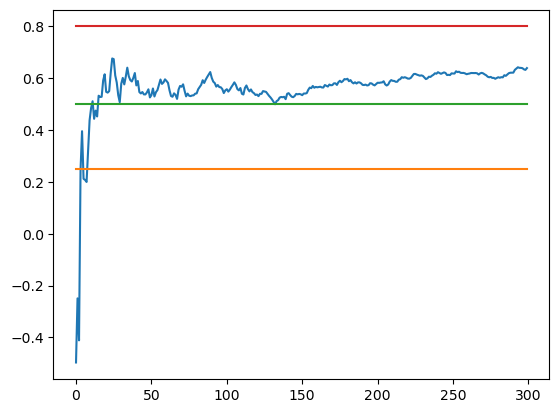

No of times explored:  19
No of times exploited:  281
Mean of rewards from arm 1: 0.28008428954686815
Mean of rewards from arm 2: 0.3278283252761306
Mean of rewards from arm 3: 0.9933814886908834


In [34]:
c1 = three_arm_bandit_epsilon_greedy(0.25, 0.5, 0.8, 0.1, 300)

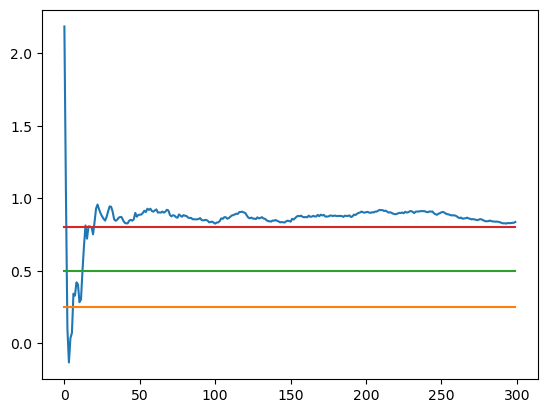

No of times explored:  19
No of times exploited:  281
Mean of rewards from arm 1: -0.05129024915452795
Mean of rewards from arm 2: 0.19489130087127066
Mean of rewards from arm 3: 0.9200113861667234


In [35]:
c2 = three_arm_bandit_epsilon_greedy(0.25, 0.5, 0.8, 0.05, 300)

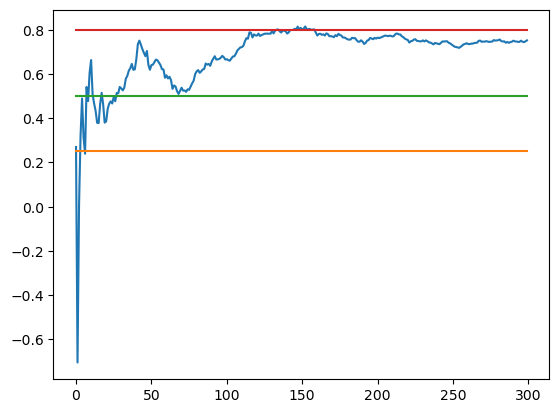

No of times explored:  4
No of times exploited:  296
Mean of rewards from arm 1: -0.14360211926481306
Mean of rewards from arm 2: 0.03836324104485397
Mean of rewards from arm 3: 0.9151671066872358


In [36]:
c3 = three_arm_bandit_epsilon_greedy(0.25, 0.5, 0.8, 0.01, 300)

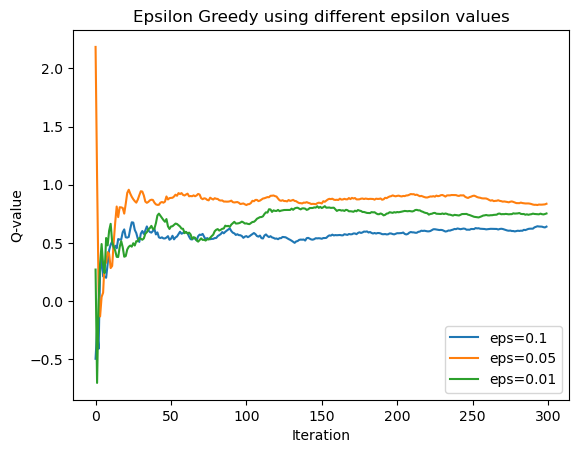

In [37]:
plt.plot(c1,label='eps=0.1')
plt.plot(c2,label='eps=0.05')
plt.plot(c3,label='eps=0.01')
plt.xlabel('Iteration')
plt.ylabel('Q-value')
plt.title('Epsilon Greedy using different epsilon values')
plt.legend(loc='lower right')

In [68]:
'''This function takes four parameters:
m1: The mean reward of the first action (arm).
m2: The mean reward of the second action (arm).
eps: The probability of choosing a random action (exploration rate).
N: The total number of iterations (time steps) to run the bandit problem.'''

def multi_arm_bandit_epsilon_greedy(m, eps, N):
    # m is the number of arms
  actions= []
  avgs = []
  for i in range(m):
    avg_value = float(input(f"Enter the average for the action {i+1} : "))
    avgs.append(avg_value)
    actions.append(Action(avg_value))


  # actions = [Action(m1), Action(m2)]                      #initializes two actions with means m1 and m2.
  data = np.empty(N)                                      #initializes an empty array data to store the rewards obtained in each iteration.
  explore,exploit=0,0                                    # '''counters explore and exploit to keep track of how many times the algorithm explores
  #                                                         (chooses a random action) and exploits (chooses the action with the highest estimated reward), respectively.'''
  for i in range(N):
    p = np.random.random()                                #generates a random number p between 0 and 1.
    if p < eps:                                           #If p is less than eps, the algorithm chooses to explore by randomly selecting one of the actions.
      j = np.random.choice(2)                             #'''If p is greater than or equal to eps, the algorithm chooses to exploit by selecting the action with
      #                                                        the highest estimated reward.'''
      explore+=1
    else:
      j = np.argmax([a.mean for a in actions])            #'''It selects the chosen action (j), selects a reward (x), and updates the action's estimate based
                                                            #on the observed reward using a fixed step size of 0.1.'''
      exploit+=1
    x = actions[j].select()
    actions[j].update(x,0.1)
    data[i] = x                                            #It stores the observed reward x in the data array.
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)     #calculates the cumulative average reward obtained at each time step and plots it.
  plt.plot(cumulative_average)
  for i in range(len(actions)):
    plt.plot(np.ones(N)*avgs[i])
  # plt.plot(np.ones(N)*m2)
  plt.show()
  print("No of times explored: ",explore)
  print("No of times exploited: ",exploit)
  print("The value of eps : ", eps)
  for i in range(len(actions)):
    print(f"Mean of rewards from arm {i+1}: {actions[i].mean}")     #prints the final estimated mean rewards for each action.
  return cumulative_average                                         #returns the cumulative average rewards over time.

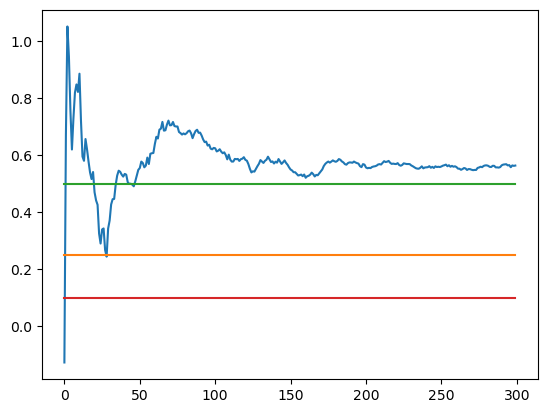

No of times explored:  35
No of times exploited:  265
The value of eps :  0.1
Mean of rewards from arm 1: 0.38428891992780423
Mean of rewards from arm 2: 0.4529211581880015
Mean of rewards from arm 3: -0.055288080895908254


array([-0.12621565,  0.67019587,  1.05074664,  0.94503379,  0.75645144,
        0.61976208,  0.72960662,  0.81911973,  0.84777614,  0.82149967,
        0.88533827,  0.71997023,  0.59504769,  0.58016525,  0.65648897,
        0.62077156,  0.57811219,  0.53978449,  0.51631778,  0.54088941,
        0.47014287,  0.44167512,  0.42623078,  0.32556098,  0.29042331,
        0.33977504,  0.34324609,  0.26791234,  0.24459298,  0.34282564,
        0.37093875,  0.42732214,  0.44584666,  0.44663865,  0.49574626,
        0.52848267,  0.54554521,  0.5416702 ,  0.53166445,  0.52488078,
        0.53431403,  0.53181024,  0.50534908,  0.49951454,  0.49996459,
        0.49694392,  0.49094498,  0.50816082,  0.52905704,  0.54844036,
        0.554979  ,  0.57743065,  0.57252381,  0.55740291,  0.5634222 ,
        0.59154286,  0.56891867,  0.60479618,  0.60671234,  0.60761289,
        0.63950906,  0.66432858,  0.65831277,  0.68924661,  0.69275545,
        0.71647269,  0.68581085,  0.68719443,  0.70703262,  0.72

In [80]:
multi_arm_bandit_epsilon_greedy(3, 0.1, 300)

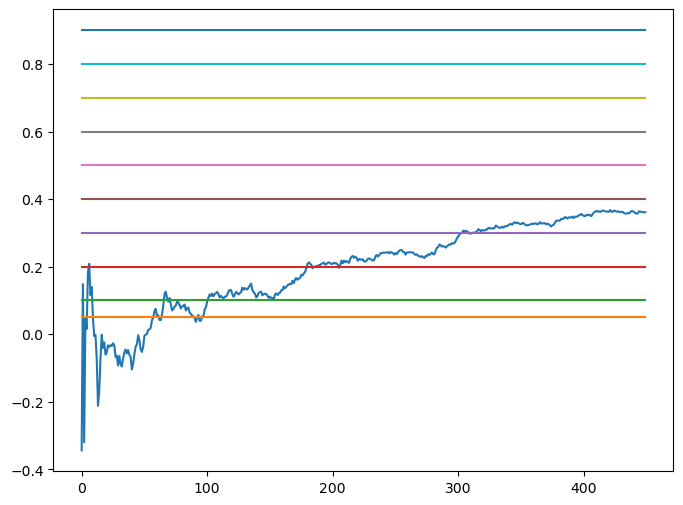

No of times explored:  139
No of times exploited:  311
The value of eps :  0.32147154827895374
Mean of rewards from arm 1: 0.151579898589846
Mean of rewards from arm 2: -0.19881319169040007
Mean of rewards from arm 3: -0.04883479591076319
Mean of rewards from arm 4: -0.014223432536913938
Mean of rewards from arm 5: -0.04161819417500309
Mean of rewards from arm 6: -0.01597629845596365
Mean of rewards from arm 7: -0.09515774688533733
Mean of rewards from arm 8: -0.11957667684958412
Mean of rewards from arm 9: 0.6613022353570643
Mean of rewards from arm 10: 0


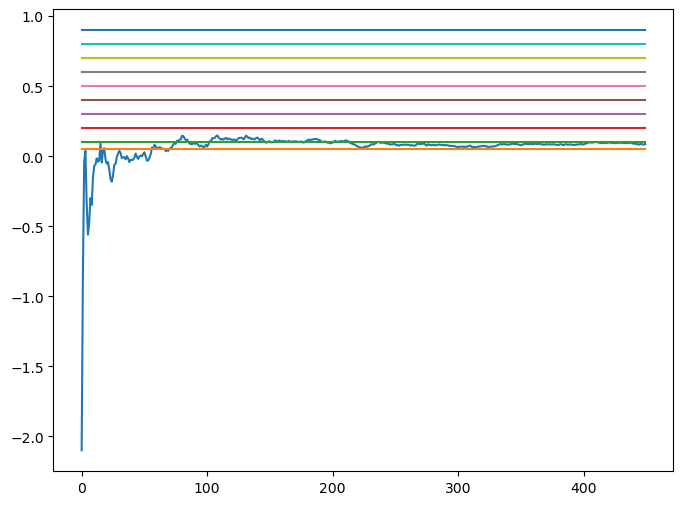

No of times explored:  323
No of times exploited:  127
The value of eps :  0.7137315315510838
Mean of rewards from arm 1: 0.059747107246157366
Mean of rewards from arm 2: 0.01988927590902735
Mean of rewards from arm 3: -0.047425519413515624
Mean of rewards from arm 4: 0.20106691987625538
Mean of rewards from arm 5: 0
Mean of rewards from arm 6: 0
Mean of rewards from arm 7: 0
Mean of rewards from arm 8: 0
Mean of rewards from arm 9: 0
Mean of rewards from arm 10: 0


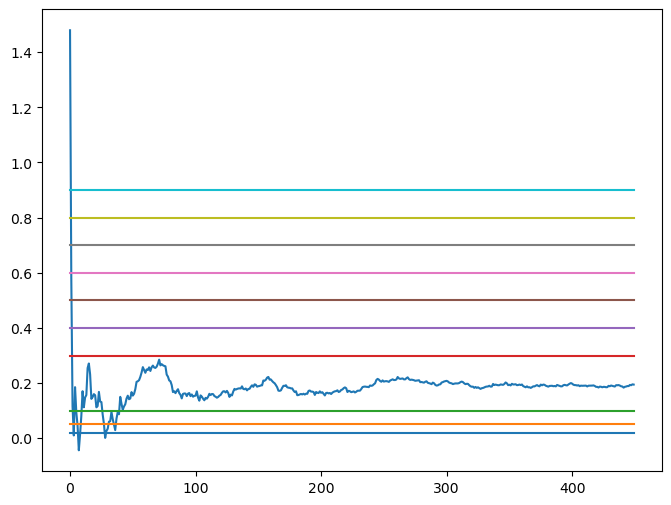

No of times explored:  351
No of times exploited:  99
The value of eps :  0.8156548206017944
Mean of rewards from arm 1: -0.2013822824742384
Mean of rewards from arm 2: 0.6546696648328444
Mean of rewards from arm 3: 0.32163537977704315
Mean of rewards from arm 4: 0
Mean of rewards from arm 5: 0
Mean of rewards from arm 6: 0
Mean of rewards from arm 7: 0
Mean of rewards from arm 8: 0
Mean of rewards from arm 9: 0
Mean of rewards from arm 10: 0


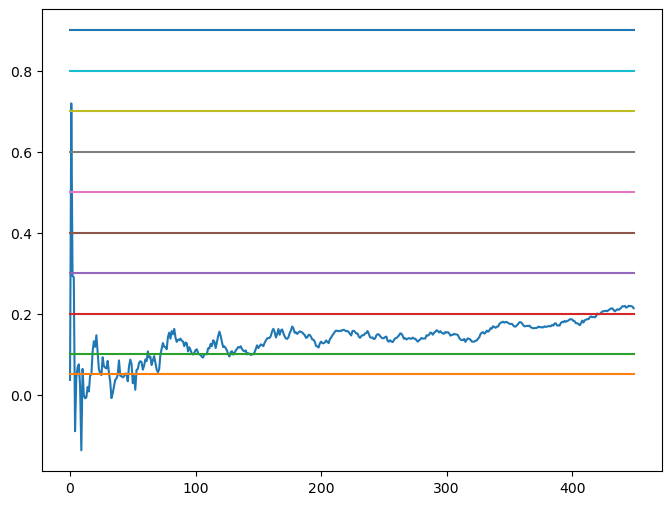

No of times explored:  155
No of times exploited:  295
The value of eps :  0.325270003589636
Mean of rewards from arm 1: -0.10612956572002333
Mean of rewards from arm 2: -0.003800712751463646
Mean of rewards from arm 3: -0.027758892351633133
Mean of rewards from arm 4: -0.03995066941520803
Mean of rewards from arm 5: -0.1171321692533684
Mean of rewards from arm 6: -0.11387085457729747
Mean of rewards from arm 7: 0.5291482549506334
Mean of rewards from arm 8: 0
Mean of rewards from arm 9: 0
Mean of rewards from arm 10: 0


In [73]:
epsilons = []
c = []

for i in range(4):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    
    # Generate a random epsilon value for each iteration
    eps = random.random()
    epsilons.append(eps)
    
    # Call your multi-arm bandit function
    c_av_value = multi_arm_bandit_epsilon_greedy(10, eps, 450)
    c.append(c_av_value)

    # Plot the cumulative average for the current subplot
    axes.plot(c[i], label="EPS : {}".format(eps))
    axes.set_title('Subplot {}'.format(i+1))
    axes.legend()

plt.show()

450

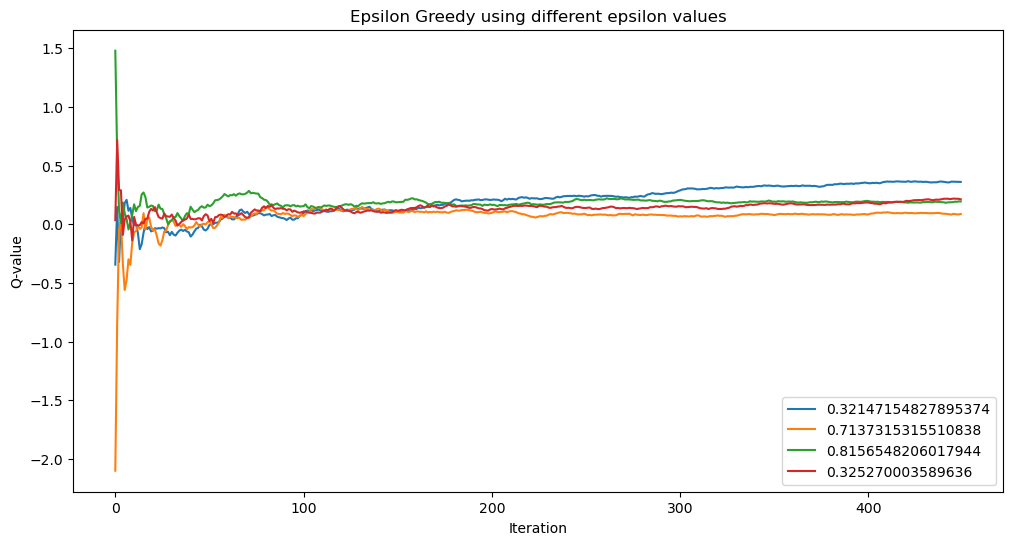

In [76]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Your existing code for plotting
plt.plot(c[0], label='{}'.format(epsilons[0]))
plt.plot(c[1], label='{}'.format(epsilons[1]))
plt.plot(c[2], label='{}'.format(epsilons[2]))
plt.plot(c[3], label='{}'.format(epsilons[3]))

plt.xlabel('Iteration')
plt.ylabel('Q-value')
plt.title('Epsilon Greedy using different epsilon values')
plt.legend(loc='lower right')

# Show the plot
plt.show()


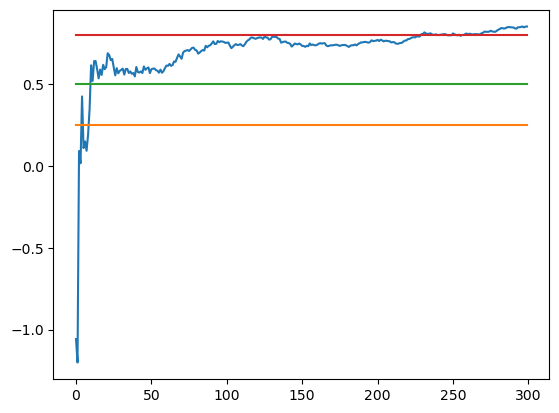

No of times explored:  30
No of times exploited:  270
The value of eps :  0.1
Mean of rewards from arm 1: -0.004114604312256395
Mean of rewards from arm 2: 0.4980955045770466
Mean of rewards from arm 3: 1.1258638603741629


array([-1.0574062 , -1.20038586,  0.09057611,  0.0156398 ,  0.42374657,
        0.10849725,  0.14928252,  0.09208446,  0.19017077,  0.34635498,
        0.61373741,  0.518292  ,  0.63951791,  0.63961316,  0.59041778,
        0.53424659,  0.58788682,  0.55507641,  0.61676169,  0.59009651,
        0.60247673,  0.68742293,  0.67696313,  0.64595564,  0.65275227,
        0.60219015,  0.55238267,  0.59647539,  0.5652438 ,  0.57954266,
        0.58598414,  0.59320142,  0.55703312,  0.59130927,  0.59180662,
        0.56700817,  0.57659816,  0.56177606,  0.56692808,  0.54601329,
        0.60344652,  0.57261263,  0.56982949,  0.57676093,  0.56666438,
        0.60665706,  0.58659939,  0.59493631,  0.60077624,  0.56632107,
        0.59021854,  0.59335583,  0.59422626,  0.58464604,  0.58035805,
        0.56906089,  0.58723095,  0.56858058,  0.57823211,  0.59729576,
        0.61222935,  0.61076328,  0.62233057,  0.6105955 ,  0.61500038,
        0.63707013,  0.63522873,  0.6592191 ,  0.68011728,  0.66

In [77]:
multi_arm_bandit_epsilon_greedy(3, 0.1, 300)

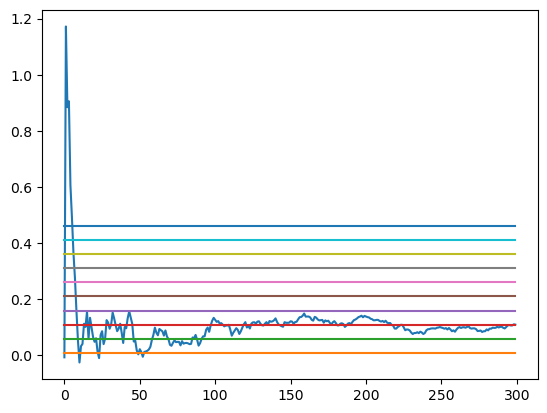

No of times explored:  264
No of times exploited:  36
The value of eps :  0.9
Mean of rewards from arm 1: 0.2573530741746146
Mean of rewards from arm 2: 0.31861088910519475
Mean of rewards from arm 3: -0.05566300742596987
Mean of rewards from arm 4: 0
Mean of rewards from arm 5: 0
Mean of rewards from arm 6: 0
Mean of rewards from arm 7: 0
Mean of rewards from arm 8: 0
Mean of rewards from arm 9: 0
Mean of rewards from arm 10: 0


array([-0.00660826,  1.17174438,  0.88411503,  0.90524258,  0.60678819,
        0.49191833,  0.36628706,  0.27533143,  0.15735372,  0.05266933,
       -0.0250001 ,  0.03313511,  0.04104289,  0.11300524,  0.1016283 ,
        0.15615612,  0.05960149,  0.13405279,  0.09969551,  0.06616828,
        0.04859745,  0.06126757,  0.01318747, -0.00928797,  0.07258157,
        0.08630016,  0.0403463 ,  0.05977468,  0.12586562,  0.11732884,
        0.09522378,  0.10997694,  0.15285229,  0.13194991,  0.10754811,
        0.08655413,  0.09571791,  0.1129398 ,  0.08076365,  0.04450894,
        0.10134458,  0.09689281,  0.13338856,  0.15720223,  0.13508262,
        0.11250111,  0.04973679,  0.05255075,  0.01751866,  0.00401217,
        0.02223464,  0.01231444, -0.00468533,  0.01257182,  0.01410029,
        0.01666221,  0.02138237,  0.03067084,  0.05501383,  0.07283632,
        0.09904405,  0.08098426,  0.07188314,  0.09430718,  0.08982606,
        0.08593285,  0.07067098,  0.08900944,  0.06763284,  0.05

In [82]:
multi_arm_bandit_epsilon_greedy(10, 0.9, 300)

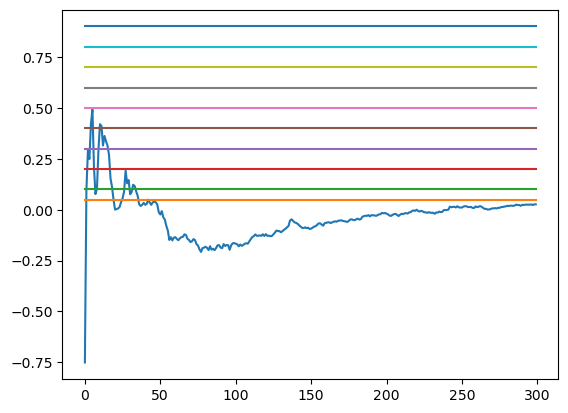

No of times explored:  277
No of times exploited:  23
The value of eps :  0.9
Mean of rewards from arm 1: 0.13705012296041613
Mean of rewards from arm 2: 0.14764238753316505
Mean of rewards from arm 3: 0.09006639349489447
Mean of rewards from arm 4: 0
Mean of rewards from arm 5: 0
Mean of rewards from arm 6: 0
Mean of rewards from arm 7: 0
Mean of rewards from arm 8: 0
Mean of rewards from arm 9: 0
Mean of rewards from arm 10: 0


array([-7.50586183e-01,  9.50475874e-02,  2.91150508e-01,  2.49043172e-01,
        4.21024779e-01,  4.91927135e-01,  2.12871535e-01,  7.66032503e-02,
        1.02879916e-01,  2.93644176e-01,  4.20011402e-01,  4.10835199e-01,
        3.15143306e-01,  3.62237451e-01,  3.36272487e-01,  3.14674458e-01,
        2.68313476e-01,  1.53103452e-01,  1.11307475e-01,  4.85894071e-02,
        3.13371495e-04,  3.14203192e-03,  5.74057652e-03,  1.34857999e-02,
        3.66923727e-02,  5.61806271e-02,  8.95368402e-02,  1.91873259e-01,
        1.29368143e-01,  1.45534065e-01,  7.59286779e-02,  8.72120809e-02,
        1.22184373e-01,  1.16341080e-01,  9.00514612e-02,  6.78598357e-02,
        2.61993986e-02,  1.78685610e-02,  2.44413361e-02,  3.33646399e-02,
        2.41247129e-02,  2.82201823e-02,  4.91442619e-02,  3.48093738e-02,
        2.38059819e-02,  3.62539578e-02,  3.92701337e-02,  3.64175338e-02,
        2.49126783e-02, -1.27348250e-02, -2.35207542e-02, -7.11953274e-03,
       -3.75073859e-02, -

In [78]:
multi_arm_bandit_epsilon_greedy(10, 0.9, 300)

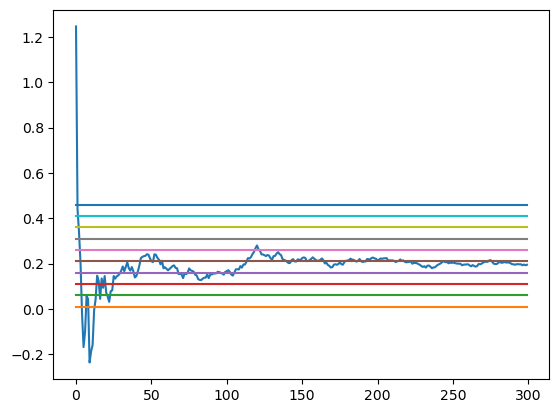

No of times explored:  38
No of times exploited:  262
The value of eps :  0.1
Mean of rewards from arm 1: -0.23514872180025354
Mean of rewards from arm 2: -0.00932356515232969
Mean of rewards from arm 3: -0.033334549408496325
Mean of rewards from arm 4: -0.04728855264957074
Mean of rewards from arm 5: 0.11032931864685207
Mean of rewards from arm 6: -0.08526717021130181
Mean of rewards from arm 7: -0.035574488678826274
Mean of rewards from arm 8: -0.07114128244738237
Mean of rewards from arm 9: -0.04170551072129773
Mean of rewards from arm 10: -0.046323392796621704


array([ 1.24659376,  0.44016729,  0.33706468,  0.20083024, -0.02230846,
       -0.16859688, -0.10073916,  0.05716805,  0.04293053, -0.23666501,
       -0.18744624, -0.15964137, -0.00698006,  0.04307001,  0.14644652,
        0.12451075,  0.04420095,  0.13428608,  0.0932655 ,  0.14486379,
        0.07206391,  0.05454945,  0.03105641,  0.07801839,  0.08177724,
        0.14494211,  0.13362575,  0.14357862,  0.14795759,  0.15559342,
        0.16900705,  0.18703823,  0.16617774,  0.18571364,  0.2055407 ,
        0.17938024,  0.1688584 ,  0.18448952,  0.16592294,  0.13867725,
        0.14437737,  0.16537973,  0.19072689,  0.22410195,  0.22973386,
        0.23257392,  0.23406304,  0.24097315,  0.23942489,  0.22324768,
        0.21039878,  0.20640138,  0.24112845,  0.23854173,  0.22509151,
        0.21697253,  0.19677538,  0.21249482,  0.17926381,  0.18362475,
        0.17723035,  0.17034288,  0.17605493,  0.18260086,  0.18902038,
        0.19210273,  0.18095126,  0.17923092,  0.15370519,  0.15

In [83]:
multi_arm_bandit_epsilon_greedy(10, 0.1, 300)